# <b>Data visualisation with Seaborn</b>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import random
%matplotlib inline

In [3]:
iris = sns.load_dataset("iris")
sepal_l = iris["sepal_length"]
sepal_w = iris["sepal_width"]
petal_l = iris["petal_length"]
petal_w = iris["petal_width"]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## <b>Single Plots</b>

### <b>>> Countplot + red line</b>

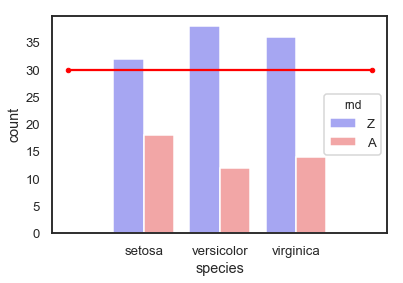

In [7]:
with sns.axes_style("white"):
    iris["rnd"] = np.random.choice(["A","Z"], iris.shape[0], p=[0.3,0.7])
    g = sns.countplot(iris.species, hue=iris.rnd, palette=cm.get_cmap(name="seismic")(np.linspace(0.4,0.6,2)))   
    sns.set_context("talk", font_scale=0.8)
    g.plot([-1, 3], [30, 30],".-r")    
    plt.show()

### <b>>> Jointplot + random lines</b>

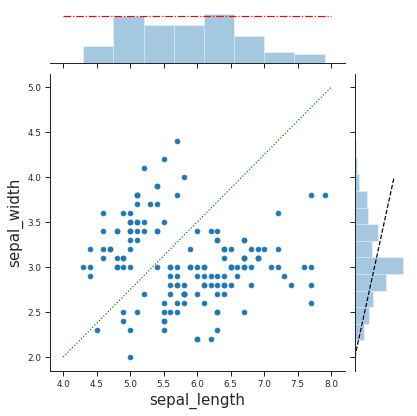

In [115]:
with sns.axes_style('ticks'):
    g = sns.jointplot(sepal_l, sepal_w, kind='scatter')
    g.ax_joint.plot([4,8], [2,5], ":k", color="g")
    g.ax_marg_x.plot([4,8],[30,30], "-.r")
    g.ax_marg_y.plot([0,30],[2,4], "--k")

### <b>>> Scatterplot </b>

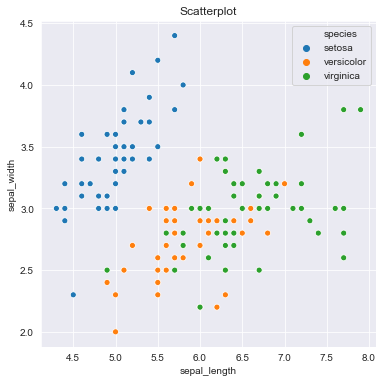

In [5]:
with sns.axes_style("darkgrid"):
    plt.subplots(figsize=(6,6))
    b = sns.scatterplot(sepal_l, sepal_w, hue=iris["species"])
    plt.title("Scatterplot")
    plt.show()

### <b>>> Heatmap with correlations</b>

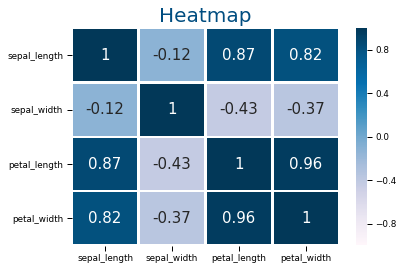

In [123]:
sns.heatmap(iris.corr(), cmap="PuBu", vmin=-1, vmax=1, linewidth=1.5, annot=True)
plt.title("Heatmap", color= "#004d80")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})   

plt.show()

### <b>>> Barplots in matplotlib with custom data</b>

In [152]:
df = pd.DataFrame({"sales":[110,150,130,150,190,200,90,160,180,160,180,200],
                  "cost":[70,90,150,160,100,160,80,200,160,160,150,105]},
                  index=pd.MultiIndex.from_product([[2018,2019,2020],["Q1","Q2","Q3","Q4"]], names=["year", "quarter"]))

df["profit"] = df["sales"] - df["cost"]
indexnames = [f"{j} {i}" for i, j in df.index]
# df.head()

<i>Plotting the smaller bar in the front with this marked code:

In [ ]:
# plotting the bars
# for num, (sale, cost) in enumerate(zip(df.sales, df.cost)):
#     if sale> cost:
#         plt.bar(indexnames[num], sale, color="darkgrey")
#         plt.bar(indexnames[num], cost, color="lightsalmon")
#     else:
#         plt.bar(indexnames[num], cost, color="lightsalmon")
#         plt.bar(indexnames[num], sale, color="darkgrey")

<i>Plotting the barchart without the cost-bar

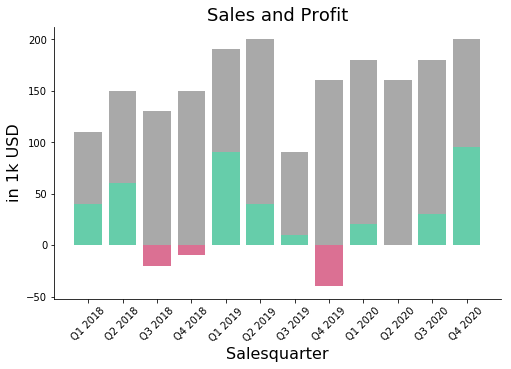

In [179]:
# green/red coloring for profits
col_profit = ["mediumaquamarine" if value>0 else "palevioletred" for value in df.profit]

#plotting the cols
fig, ax = plt.subplots(figsize=(8,5))
plt.bar(indexnames, df.sales, color="darkgrey")        
plt.bar(indexnames, df.profit, color=col_profit)

# adjusting graph
plt.xticks(rotation=45)
plt.title("Sales and Profit", fontsize=18)
plt.ylabel("in 1k USD", fontsize=16)
plt.xlabel("Salesquarter", fontsize=16)
[plt.gca().spines[i].set_visible(False) for i in ["top","right"]]
# plt.legend(["Sales","Profit", "Loss"], facecolor=["#A9A9A9", "#66CDAA", "#DB7093"])

plt.show()

## <b>Multiple plots</b>

### <b>>> Scatterplot</b>

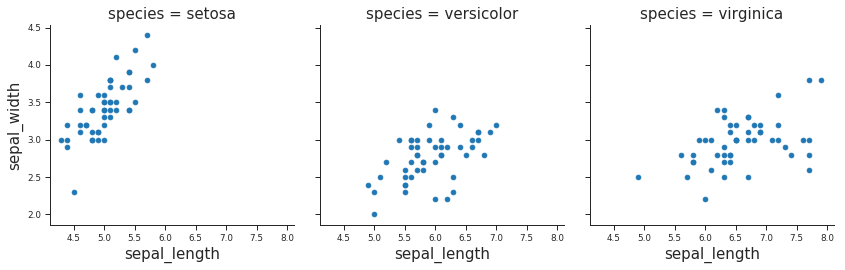

In [7]:
def scatter(x, y, color, **kwargs):
    plt.scatter(x, y,  **kwargs)

with sns.axes_style("ticks"):
    g = sns.FacetGrid(iris, hue="species", col="species", height=4)
    
g.map(scatter, "sepal_length", "sepal_width")
plt.show()

### <b>>> FacetGrid with 6 subplots</b>

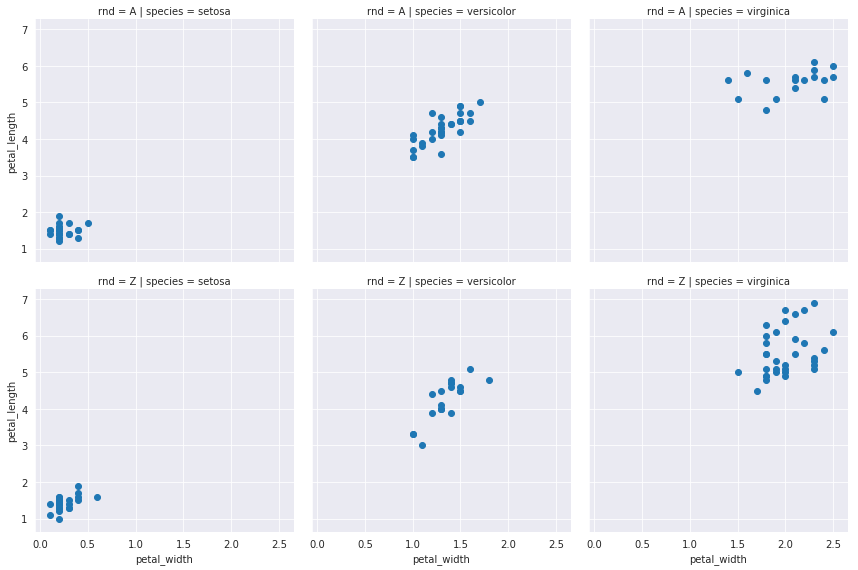

In [161]:
# Creating random values
iris["rnd"] = np.random.choice(["A","Z"], iris.shape[0], p=[0.5,0.5])

# Plotting
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(iris, col="species", row="rnd", height=4)
    g.map(plt.scatter, "petal_width", "petal_length")
plt.show()

### <b>>> Catplot</b>

In [ ]:
# Creating random categorial values
iris["Color"] = ["Green" if i <= iris.index.max()//2 else "Blue" for i in iris.index.values]
iris["Leaf-count"] = [np.random.choice(["4", "3"], p=[0.1,0.9]) for i in iris.petal_length]
li = []
for i in iris["petal_length"]:
    if i<3:
        li.append("Up to 3")
    elif 3<=i<5:
        li.append("3 to 5")
    else:
        li.append("over 5")
iris["Petal_length_category"] = li

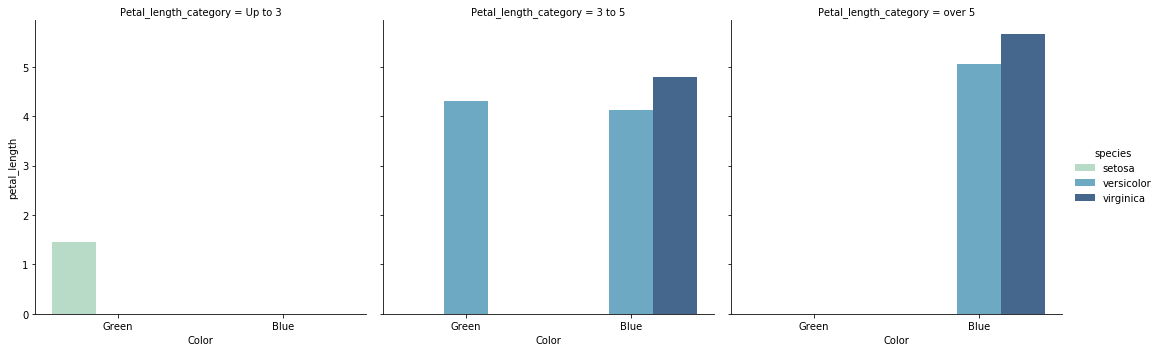

In [158]:
# Plotting the values
sns.catplot(y="petal_length", x="Color", hue="species", data=iris, col="Petal_length_category", kind = "bar", palette=cm.get_cmap(name="GnBu")(np.linspace(0.4,1,3)), alpha=0.8, ci=False)
plt.show()